In [1]:
from pathlib import Path
from tifffile import imread, imwrite
import numpy as np
import sys
import json
from stardist.matching import matching_dataset
sys.path.append("../")
from utils import *
from plots import *

SAVE_AS_SVG = True
SAVE_AS_PNG = False

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_PATH = Path("../stardist_repro/stardist_hyperparams_check").resolve()
gt_path = DATA_PATH / "gt"

folds = 3
models_pred_path = [(DATA_PATH / f"fold{i+1}").resolve() for i in range(folds)] 

In [4]:
gt_images = {}
# load images in gt_path
for img_path in gt_path.glob("*.tif"):
    img = imread(img_path)
    gt_images[img_path.stem[:2]] = img

In [21]:
# for each fold and model, the goal is to compute what is the best threshold for the model, based on Dice between the GT and the prediction
gt_dict = {
    "fold1" : "vi",
    "fold2" : "c5",
    "fold3" : "c3"
}

dices_df = pd.DataFrame(columns=["Image", "Threshold", "NMS", "Dice", "Fold"])
for model_pred_path in models_pred_path:
    print("Fold : ", model_pred_path.name)
    preds_path = model_pred_path
    for i, img_path in enumerate(preds_path.glob("*.tif")):
        img_name = img_path.stem
        img = imread(img_path)
        gt = gt_images[gt_dict[model_pred_path.name]]
        nms = float(img_path.stem.split("_nms_")[1].split("_prob_")[0])
        prob_thresh = float(img_path.stem.split("_prob_")[1])
        print("Threshold: ", prob_thresh)
        print("NMS: ", nms)
        gt = np.where(gt > 0, 1, 0)
        pred = np.where(img > 0, 1, 0)
        dice = dice_coeff(y_true=gt, y_pred=pred)
        dices_df.loc[len(dices_df.index)] = [gt_dict[model_pred_path.name], prob_thresh, nms, dice, model_pred_path.name]

Fold :  fold1
Threshold:  0.1
NMS:  0.1
Threshold:  0.2
NMS:  0.1
Threshold:  0.3
NMS:  0.1
Threshold:  0.4
NMS:  0.1
Threshold:  0.5
NMS:  0.1
Threshold:  0.6
NMS:  0.1
Threshold:  0.7
NMS:  0.1
Threshold:  0.8
NMS:  0.1
Threshold:  0.9
NMS:  0.1
Threshold:  0.1
NMS:  0.2
Threshold:  0.2
NMS:  0.2
Threshold:  0.3
NMS:  0.2
Threshold:  0.4
NMS:  0.2
Threshold:  0.5
NMS:  0.2
Threshold:  0.6
NMS:  0.2
Threshold:  0.7
NMS:  0.2
Threshold:  0.8
NMS:  0.2
Threshold:  0.9
NMS:  0.2
Threshold:  0.1
NMS:  0.3
Threshold:  0.2
NMS:  0.3
Threshold:  0.3
NMS:  0.3
Threshold:  0.4
NMS:  0.3
Threshold:  0.5
NMS:  0.3
Threshold:  0.6
NMS:  0.3
Threshold:  0.7
NMS:  0.3
Threshold:  0.8
NMS:  0.3
Threshold:  0.9
NMS:  0.3
Threshold:  0.1
NMS:  0.4
Threshold:  0.2
NMS:  0.4
Threshold:  0.3
NMS:  0.4
Threshold:  0.4
NMS:  0.4
Threshold:  0.5
NMS:  0.4
Threshold:  0.6
NMS:  0.4
Threshold:  0.7
NMS:  0.4
Threshold:  0.8
NMS:  0.4
Threshold:  0.9
NMS:  0.4
Threshold:  0.1
NMS:  0.5
Threshold:  0.2
NMS:  0.

In [22]:
dices_df.sort_values(by="Threshold", inplace=True)
dices_df

,Image,Threshold,NMS,Dice,Fold
0,vi,0.1,0.1,0.664934,fold1
153,c5,0.1,0.9,0.735780,fold2
90,c5,0.1,0.2,0.793195,fold2
63,vi,0.1,0.8,0.593665,fold1
198,c3,0.1,0.5,0.734034,fold3
...,...,...,...,...,...
44,vi,0.9,0.5,0.053178,fold1
35,vi,0.9,0.4,0.053178,fold1
206,c3,0.9,0.5,0.000017,fold3
17,vi,0.9,0.2,0.053178,fold1


In [23]:
dices_df.groupby("Fold").apply(lambda x: x.loc[x["Dice"].idxmax()])

971282983.py (1): DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,Image,Threshold,NMS,Dice,Fold
Fold,,,,,
fold1,vi,0.6,0.7,0.701244,fold1
fold2,c5,0.2,0.8,0.810436,fold2
fold3,c3,0.6,0.8,0.763421,fold3


In [24]:
# show 3 best Dice for each fold
dices_df.groupby("Fold").apply(lambda x: x.nlargest(3, "Dice"))

327610266.py (2): DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Image  Threshold  NMS      Dice   Fold
Fold                                            
fold1 59     vi        0.6  0.7  0.701244  fold1
      50     vi        0.6  0.6  0.700532  fold1
      41     vi        0.6  0.5  0.700265  fold1
fold2 145    c5        0.2  0.8  0.810436  fold2
      146    c5        0.3  0.8  0.809912  fold2
      135    c5        0.1  0.7  0.807032  fold2
fold3 230    c3        0.6  0.8  0.763421  fold3
      231    c3        0.7  0.8  0.762931  fold3
      221    c3        0.6  0.7  0.762269  fold3

In [25]:
dices_df.groupby("Threshold").Dice.median().sort_values(ascending=False).head(5)

Threshold
0.6    0.760157
0.7    0.758959
0.5    0.757858
0.4    0.748480
0.3    0.745520
Name: Dice, dtype: float64

In [26]:
dices_df.groupby("NMS").Dice.median().sort_values(ascending=False).head(5)

NMS
0.5    0.734034
0.4    0.733509
0.6    0.732413
0.3    0.731964
0.2    0.730484
Name: Dice, dtype: float64

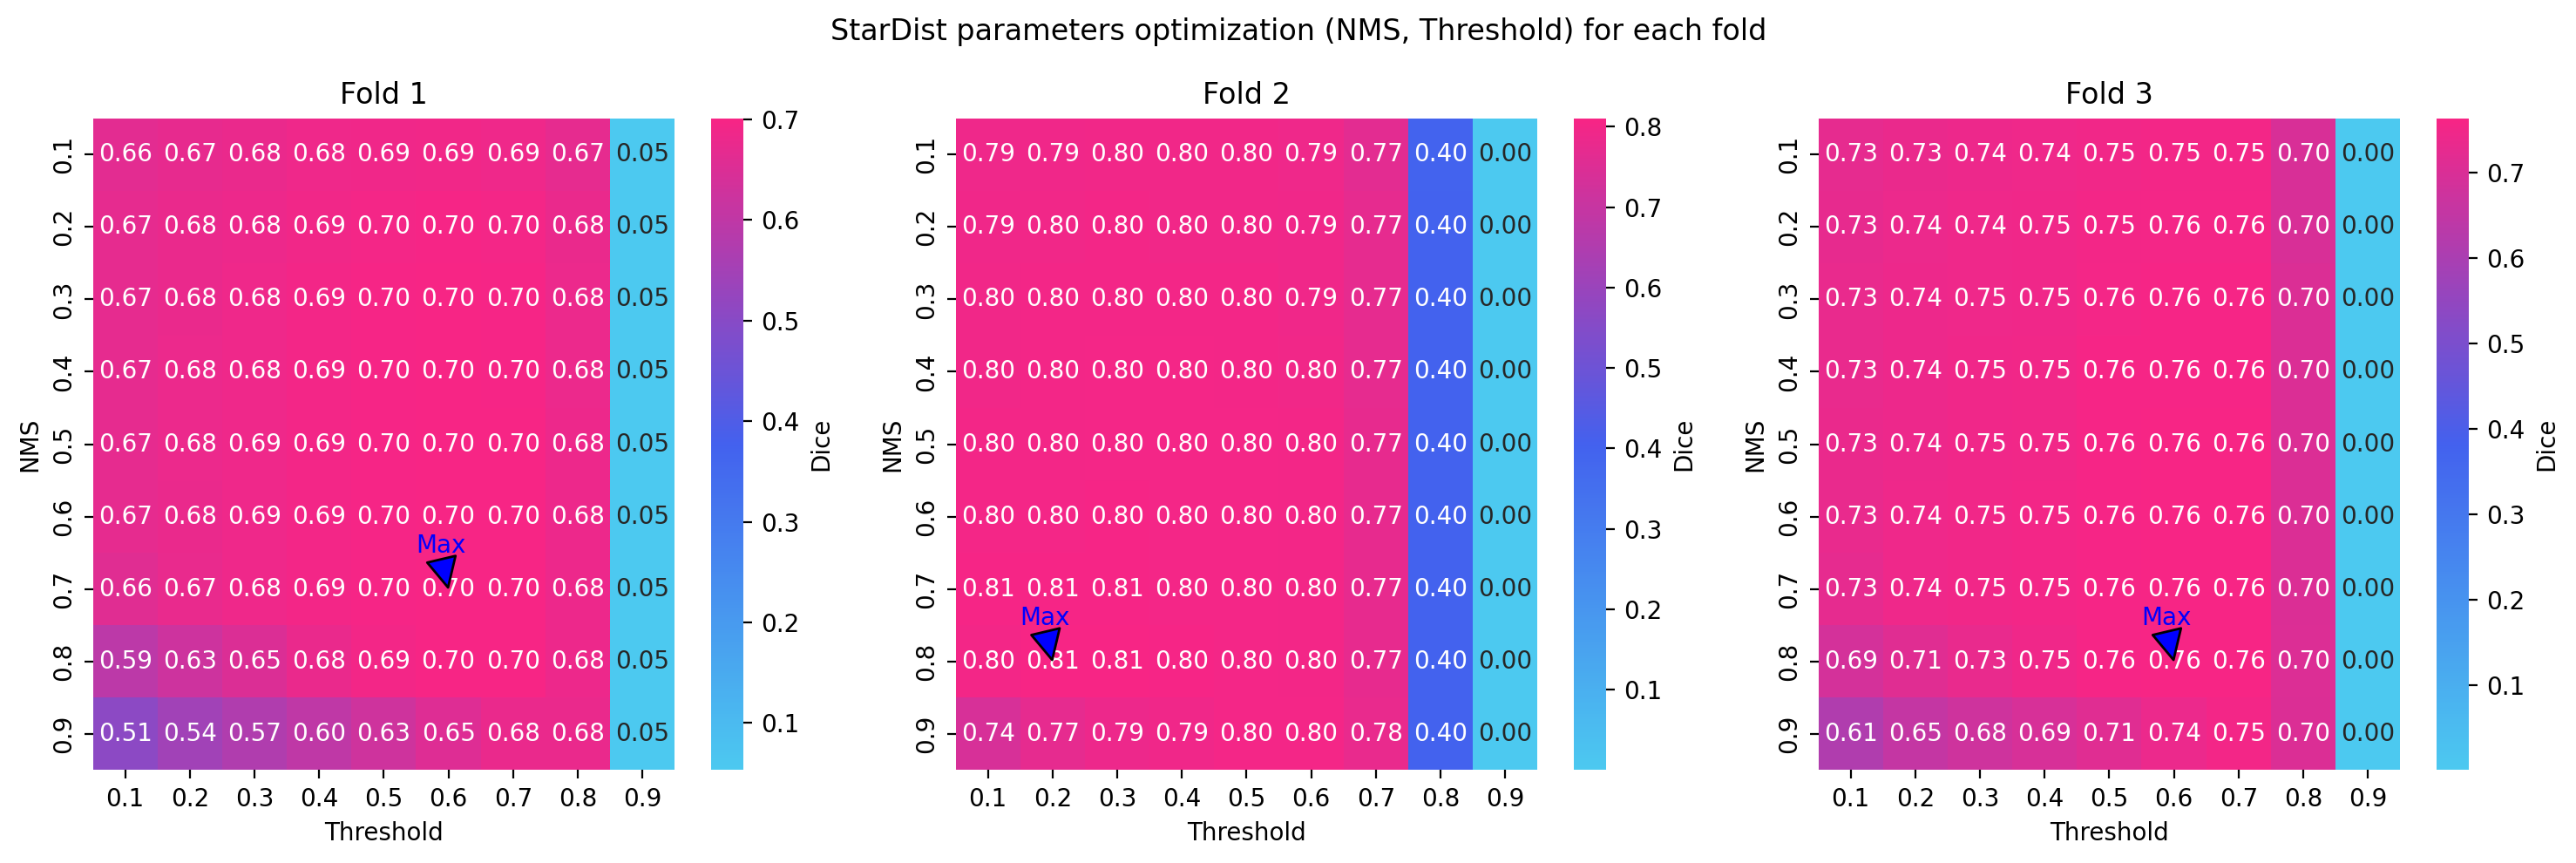

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=DPI)
for i in range(folds):
    # Group by 'NMS' and 'Threshold' and calculate the mean of 'Dice' for fold i
    grouped_df = dices_df[dices_df['Fold'] == f"fold{i+1}"].groupby(['NMS', 'Threshold'])['Dice'].median().reset_index()

    pivot_df = grouped_df.pivot(index='NMS', columns='Threshold', values='Dice')
    max_coords = np.where(pivot_df == pivot_df.max().max())
    sns.heatmap(pivot_df, cmap=SEQUENTIAL_COLORMAP, annot=True, fmt=".2f", cbar_kws={'label': 'Dice'}, ax=axs[i])
    # Annotate the maximum value
    axs[i].annotate('Max', xy=(max_coords[1][0]+0.5, max_coords[0][0]+0.5), xytext=(max_coords[1][0], max_coords[0][0]),
                arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
    axs[i].set_title(f"Fold {i+1}")
plt.suptitle("StarDist parameters optimization (NMS, Threshold) for each fold")
plt.tight_layout()
if SAVE_AS_SVG:
    plt.savefig("stardist_optimization_grid_search.svg", format="svg", bbox_inches='tight')
if SAVE_AS_PNG:
    plt.savefig("stardist_optimization_grid_search.png", format="png")
plt.show()

In [28]:
# for each fold, compare found parameters with auto-estimated thresholds
labels = []
names = []
gt_labels = []

for fold in range(3):
    fold_path = Path.home() / "Desktop/Code/CELLSEG_BENCHMARK/RESULTS/SUPERVISED_PERF_FIG/INFERENCE"
    auto_path = list((fold_path / "old").glob("*.tif"))[0]
    manual_path = list((fold_path).glob("*.tif"))[0]
    labels.append(imread(auto_path))
    print(auto_path.stem)
    names.append(f"Fold {fold+1} - Auto - {auto_path.stem}")
    print(manual_path.stem)
    labels.append(imread(manual_path))
    names.append(f"Fold {fold+1} - Manual - {manual_path.stem}")
    
    labels_gt_path = (fold_path / "..").resolve()
    for img_path in labels_gt_path.glob("*.tif"):
        if "label" in img_path.stem:
            print(img_path.stem)
            gt_labels.append(imread(img_path))
            gt_labels.append(imread(img_path))
            break
    print("-"*10)

IndexError: list index out of range

In [ ]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

model_stats = {}
names_stats = {}

for i, p in enumerate(labels):
    print(f"Validating on {names[i]}")
    fold = int(names[i].split(" ")[1].split("-")[0])
    model_stats[f"fold{fold}"] = [] if f"fold{fold}" not in model_stats else model_stats[f"fold{fold}"]
    names_stats[f"fold{fold}"] = [] if f"fold{fold}" not in names_stats else names_stats[f"fold{fold}"]
    if len(p.shape) > 3:
        p = p[0].astype(np.uint64)
    stats = [matching_dataset(
        gt_labels[i], 
        p,
        thresh=t, 
        show_progress=False
        ) for t in taus]
    model_stats[f"fold{fold}"].append(stats)
    names_stats[f"fold{fold}"].append(f"{names[i]}")
    print("*"*20)

Validating on Fold 1 - Auto - visual_stardist_labels
********************
Validating on Fold 1 - Manual - stardist_fold1
********************
Validating on Fold 2 - Auto - c5_stardist
********************
Validating on Fold 2 - Manual - stardist_fold2
********************
Validating on Fold 3 - Auto - c3_labels_stardist
********************
Validating on Fold 3 - Manual - stardist_fold3
********************


In [ ]:
# get cellpose_count first color of tab20 as rgb hex
sd_color = get_n_shades(COLORMAP[0], n_shades=6)
sd_color

['#000000', '#102A33', '#205566', '#308099', '#40AACC', '#50D5FF']

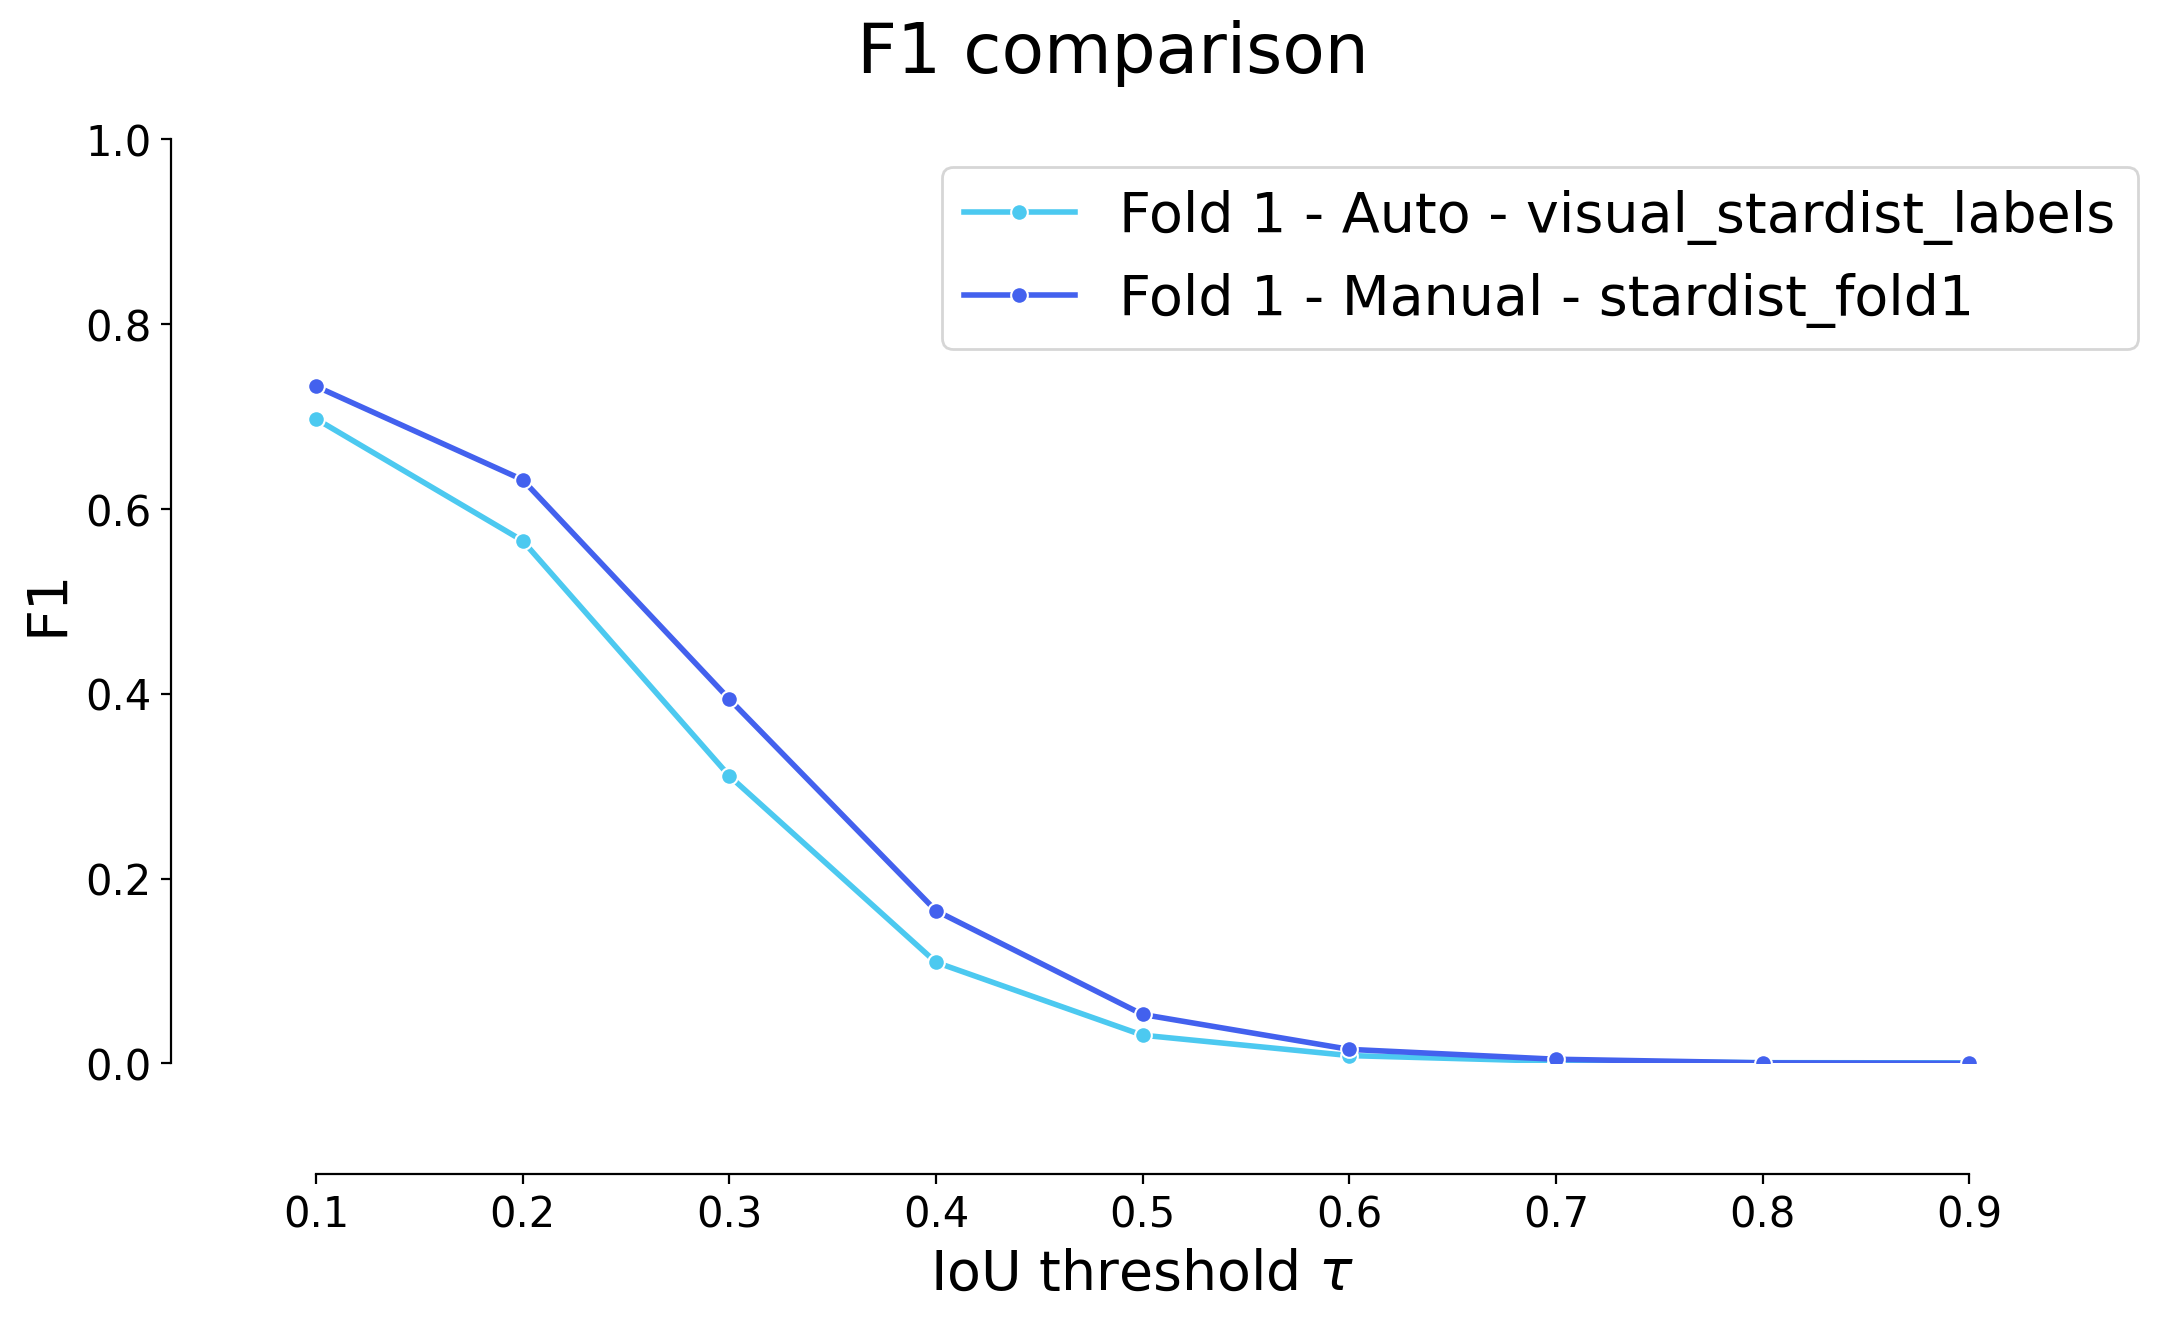

In [ ]:
plot_stat_comparison(taus=taus, stats_list=model_stats["fold1"], model_names=names_stats["fold1"], metric="IoU", colormap=COLORMAP)
plt.show()
if SAVE_AS_SVG:
    plt.savefig("stardist_auto_vs_manual_fold1_iou.svg", format="svg", bbox_inches='tight')
if SAVE_AS_PNG:
    plt.savefig("stardist_auto_vs_manual_fold1_iou.png", format="png")

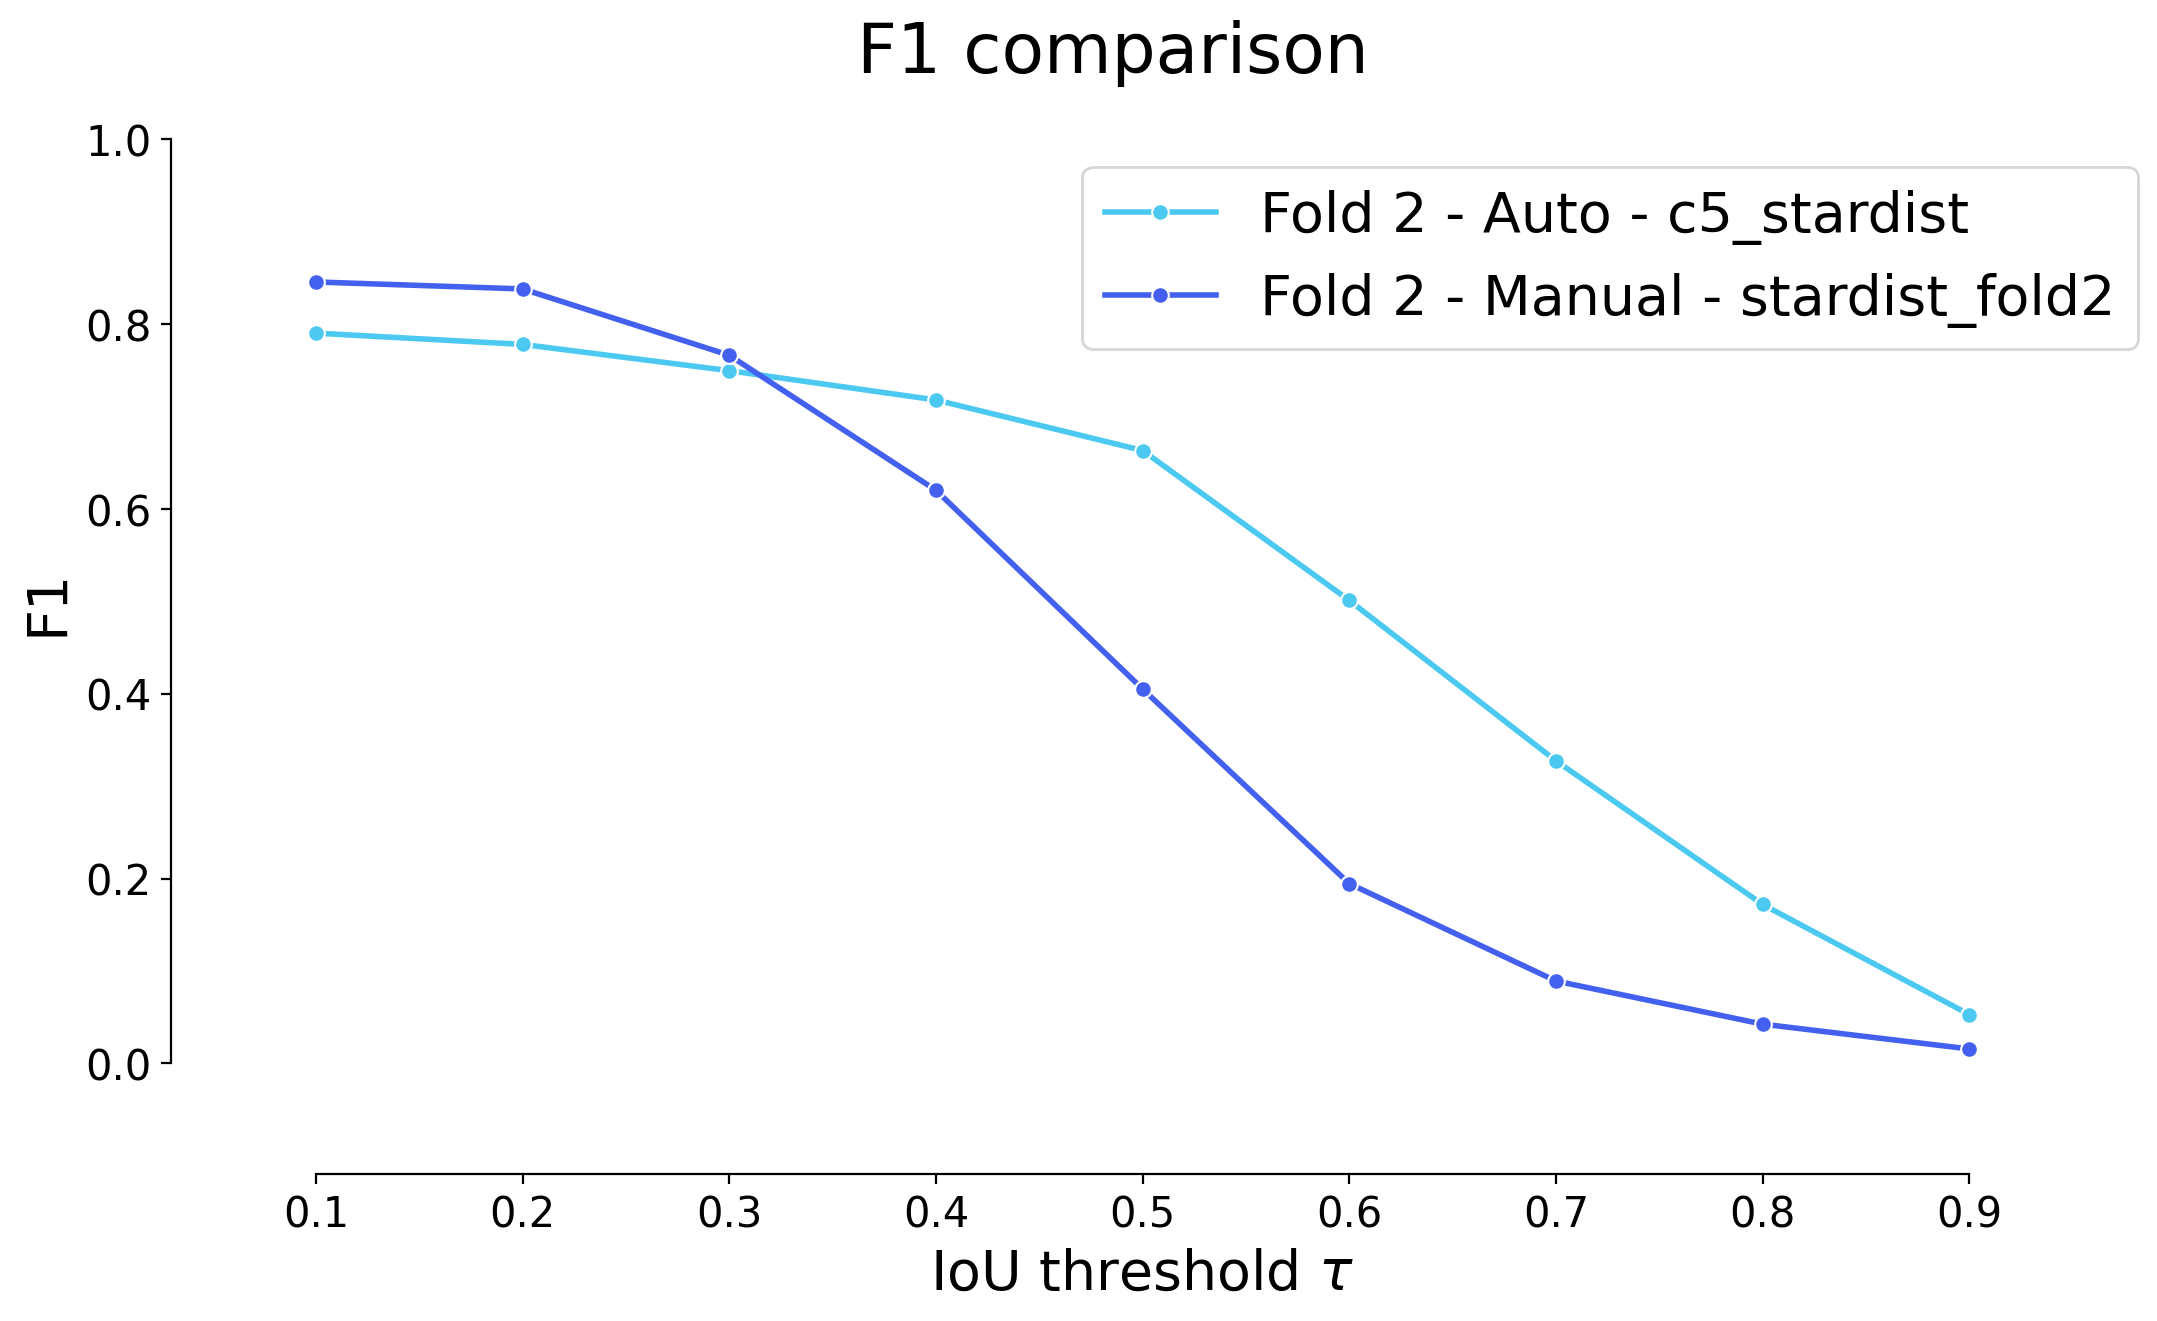

In [ ]:
plot_stat_comparison(taus=taus, stats_list=model_stats["fold2"], model_names=names_stats["fold2"], metric="IoU", colormap=COLORMAP)
if SAVE_AS_SVG:
    plt.savefig("stardist_auto_vs_manual_fold2_iou.svg", format="svg", bbox_inches='tight')
if SAVE_AS_PNG:
    plt.savefig("stardist_auto_vs_manual_fold2_iou.png", format="png")

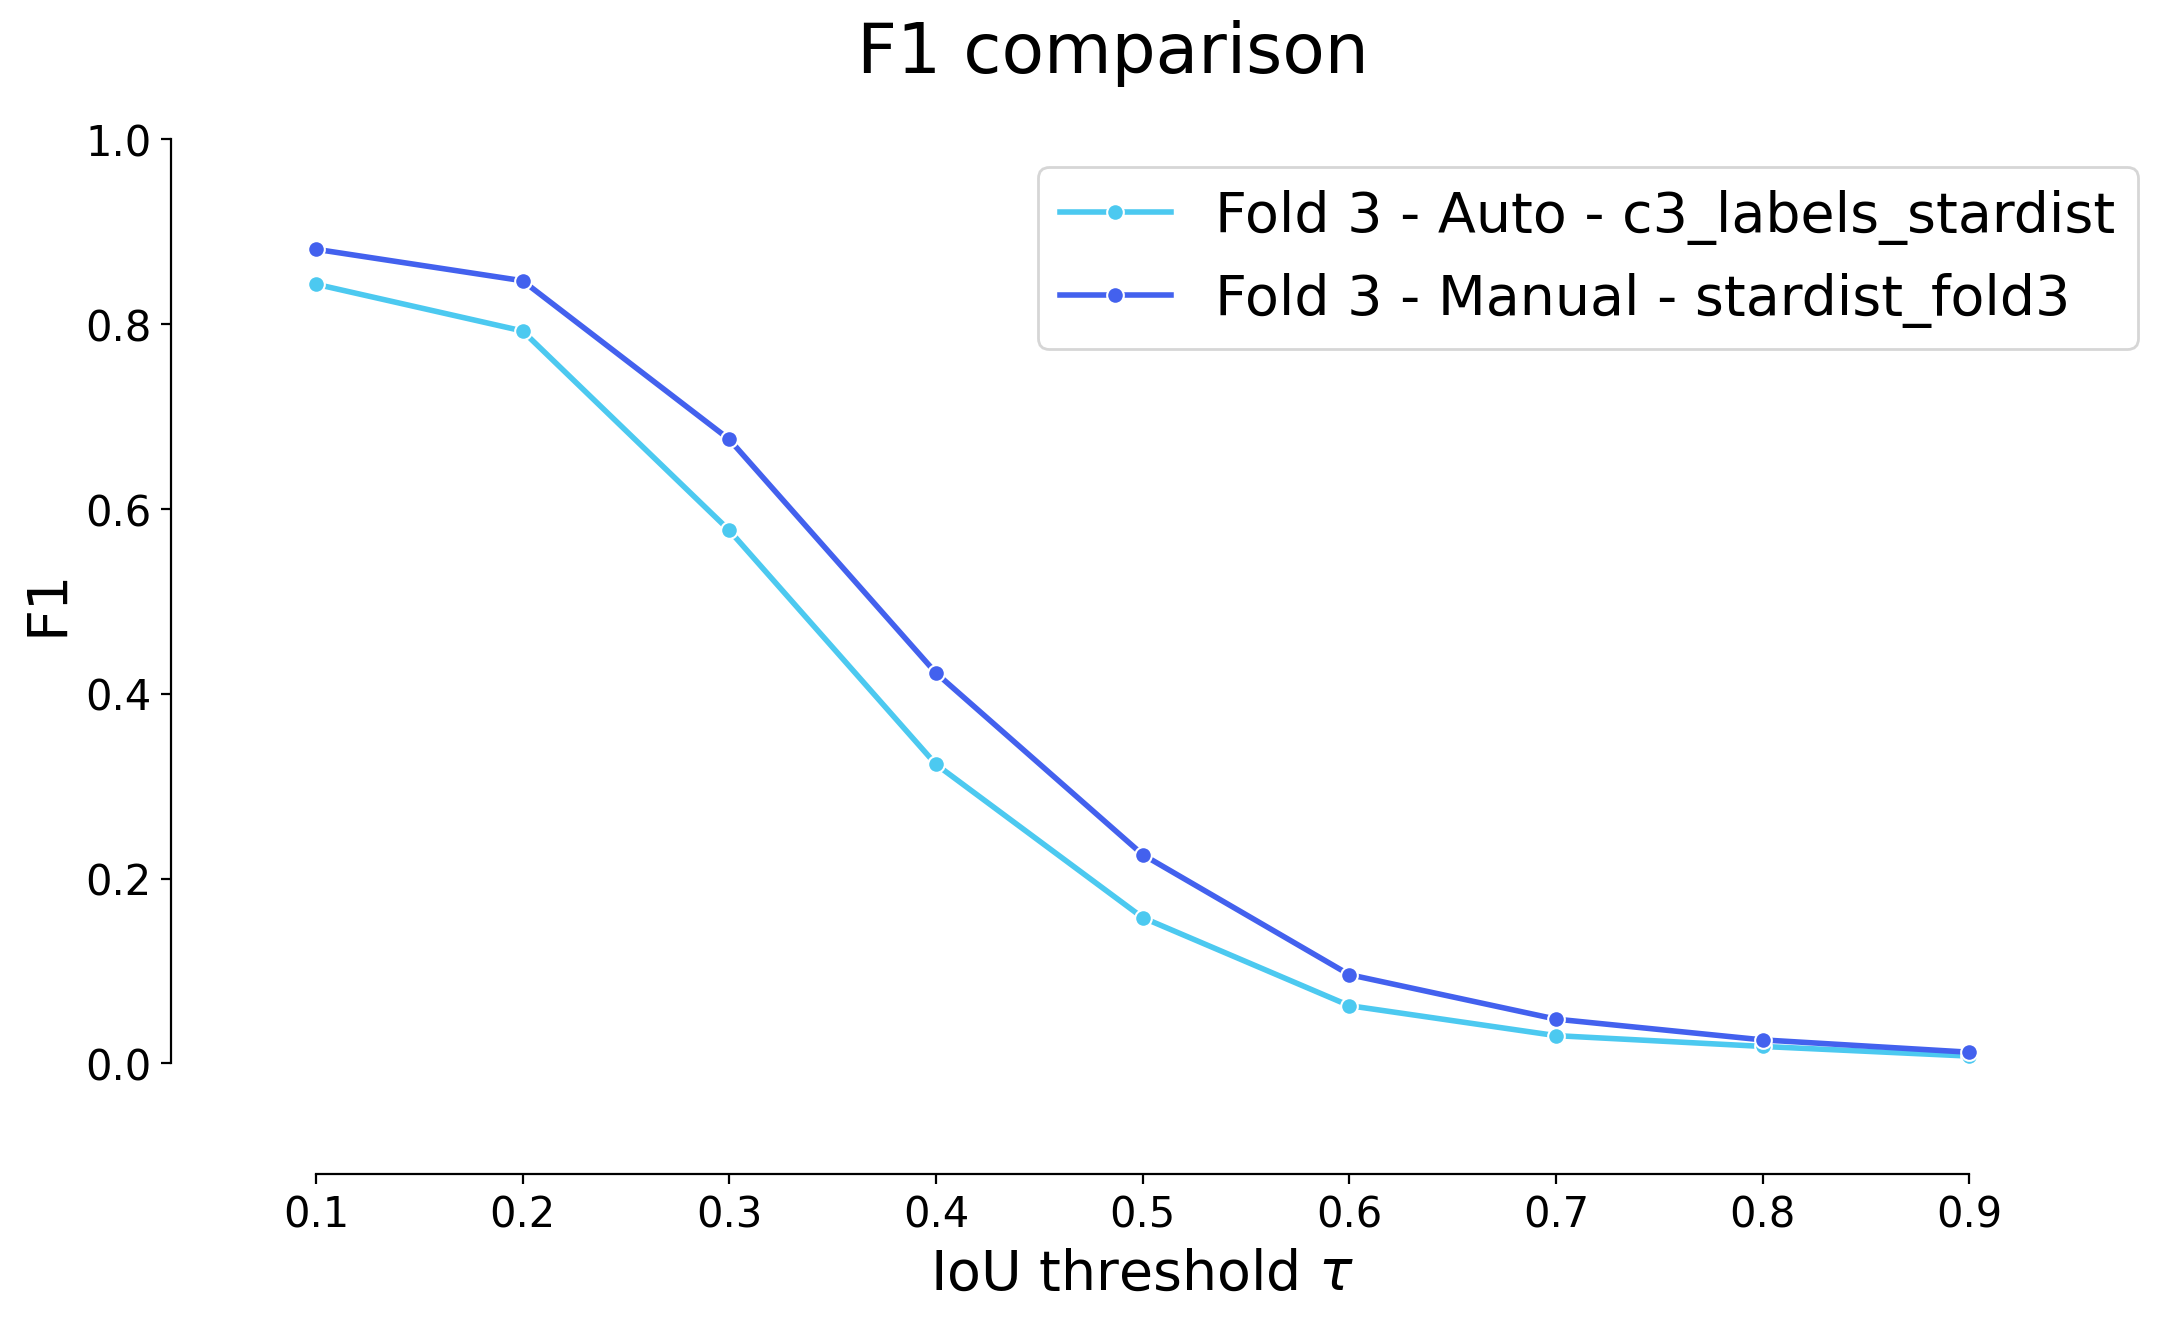

In [ ]:
plot_stat_comparison(taus=taus, stats_list=model_stats["fold3"], model_names=names_stats["fold3"], metric="IoU", colormap=COLORMAP)
if SAVE_AS_SVG:
    plt.savefig("stardist_auto_vs_manual_fold3_iou.svg", format="svg", bbox_inches='tight')
if SAVE_AS_PNG:
    plt.savefig("stardist_auto_vs_manual_fold3_iou.png", format="png")